###**MINIST Handwritten Digit Classification using Deep Learning (Neural Network)**

Importing the Dependencies

In [ ]:
import numpy as np    #use to convert image data into numpy arrays
import matplotlib.pyplot as plt            #use to visualize the images in the dataset
import seaborn as sns          #use to plot the image
import cv2        #opencv library where cv is computer vision and used in image recognition tasks
from google.colab.patches import cv2_imshow       #function of cv2 used to show the image
from PIL import Image      #image processing library
#below all are deep learning libraries
import tensorflow as tf        #developed by google
tf.random.set_seed(3)                #setting some random seed value for tensorflow
from tensorflow import keras     #used to create neural network
from keras.datasets import mnist        #importing mnist dataset available in keras library
from tensorflow.math import confusion_matrix

Loading the MNIST data from Keras.datasets

In [ ]:
#we are working on greyscale images
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()      #dividing the datasets into training and testing data

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#displaying type of the arrays
type(X_train)

numpy.ndarray

In [ ]:
#shape of the numpy arrays
print(X_train.shape)            #show the count of images in the training datasdet and the dimension of images
print(Y_train.shape)           #show the labels of images in training datasets
print(X_test.shape)           #show the count of images in testing datasets and the dimension of images
print(Y_test.shape)          #show the labels of images in testing datasets

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Training Data = 60,000 images

Testing Data = 10,000 images


Image Dimension --> 28 x 28

Grayscale Images --> 1 color channel


In [ ]:
#printing the 10th image
print(X_train[10])         #image is converted to numpy array where values ranges from 0-255

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

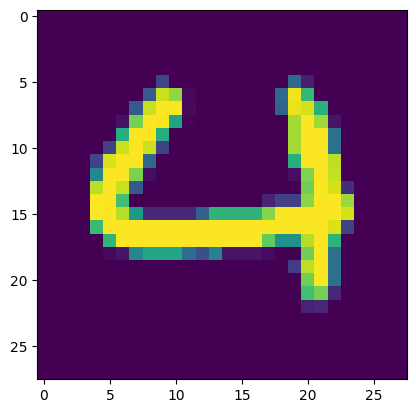

LABEL =  4


In [ ]:
#displaying the image at index 60
plt.imshow(X_train[60])
plt.show()

#displaying the label of the image
print("LABEL = ", Y_train[60])

Image Labels

In [ ]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
#finding out unique values of labels in Y_train
print(np.unique(Y_train))

#finding out unique values of labels in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


we can use these labels as such or can also use One Hot Encoding

All the images have the same dimenion in this dataset. If not, we have to resize all the images to a common dimension using padding.

In [ ]:
#scaling the values
#converting the range of 0-255 to 0-1 so that it will be easy for neural network to understand the data
X_train = X_train/255
X_test = X_test/255


In [ ]:
#printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [ ]:
# setting up layers of Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
#compiling the neural network

model.compile(optimizer='adam', #reserach for diff optimizer change it to check accuracy
              loss='sparse_categorical_crossentropy', #for one hot encoding
              metrics=['accuracy']) #no correct predictions/total no of datapoints

In [ ]:
# Training the Neural Network
history = model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2921 - accuracy: 0.9154
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1380 - accuracy: 0.9585
Epoch 3/10
1198/1875 [==================>...........] - ETA: 2s - loss: 0.1032 - accuracy: 0.9683

In [ ]:
#Training the Neural Network

model.fit(X_train,Y_train,epochs=10) #all values will be between 0-1 and epoch=10(no of times neural network will go through data)

Training data accuracy is 98.9%

**Accuracy on Test Data**

In [ ]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.1398 - accuracy: 0.9725
0.9725000262260437


Test data accuracy is 97.1%

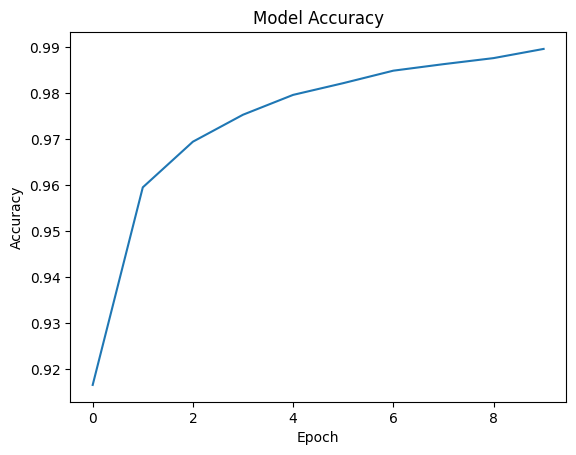

In [ ]:
# Plotting the accuracy graph
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [ ]:
print(X_test.shape)

(10000, 28, 28)


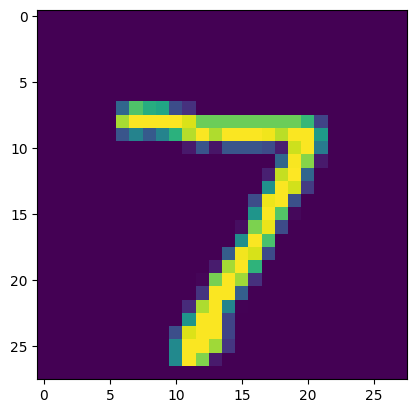

In [ ]:
#first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred=model.predict(X_test)

313/313 [==============================] - 0s 826us/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[9.2540565e-04 1.7823057e-01 6.9612698e-03 9.4510269e-01 3.0470409e-07
 1.2449134e-04 7.2750655e-12 1.0000000e+00 1.4131075e-06 5.5032551e-01]


model.predict() gives the prediction probability of each class(0-9) for the particular data

In [ ]:
#converting the prediction probability to labels

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)  #value in 7th index is heighest

7


In [ ]:
#converting the prediction probabilities to class labels for all data points
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 4, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 1, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 3, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 8, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predicted Labels


Confusion Matrix

In [ ]:
#using the confusion_matrix imported above from tensor flow
conf_mat= confusion_matrix(Y_test, Y_pred_labels) #taking the true and predicted values in array


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(conf_mat)

tf.Tensor(
[[ 969    1    1    0    0    0    3    1    3    2]
 [   0 1129    1    2    0    1    2    0    0    0]
 [   3   10  999    7    2    1    3    5    2    0]
 [   0    1    5  981    0   10    0    6    4    3]
 [   0    0    1    1  970    0    4    2    0    4]
 [   5    0    0   28    2  849    4    2    1    1]
 [   3    1    0    1    7    6  940    0    0    0]
 [   2   12   13    5    4    1    0  987    0    4]
 [   4    2    3    7    7   10    4    3  930    4]
 [   1    5    0    7   30    3    1   11    6  945]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicated Labels')

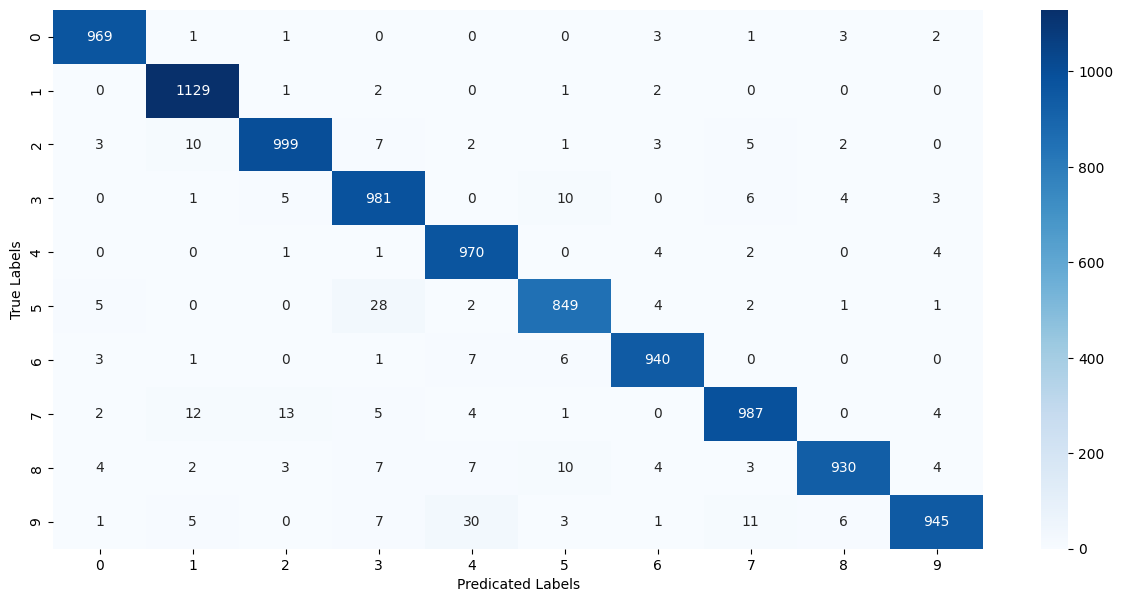

In [ ]:
#we will use the above values to build the heatmap
plt.figure(figsize=(15,7)) #defining the size of plot
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues') #defining that all values should be in integer through fmt
plt.ylabel('True Labels')
plt.xlabel('Predicated Labels')


Building a Predictive System

In [ ]:
input_image_path='/content/drive/MyDrive/MNIST Digits/MNIST_digit.png'
#converting the image into numpy array after reading it
input_image=cv2.imread(input_image_path) #the function takes path of image as argument


In [ ]:
#checking type of input image
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)
#0 means black and ... means there are several values in between

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


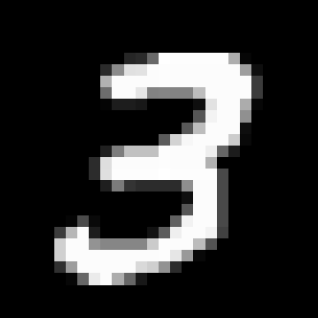

In [ ]:
#display image from numpy array
cv2_imshow(input_image)

In [ ]:
#checking shape of image
input_image.shape

#the image is read as a RGB image by cv2_imshow

(318, 318, 3)

In [ ]:
#we have to convert the image to grayscale
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape
#the image is now grayscale

(318, 318)

In [ ]:
#now we will resize the image
input_image_resize=cv2.resize(grayscale, (28,28))

In [ ]:
#now we will check the size again
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
#scaling the values here again that we did for training data
input_image_resize=input_image_resize/255


In [ ]:
#reshaping the image to tell the NN model that we're predicting for 1 image
#we're reshaping the numpy array
image_reshaped=np.reshape(input_image_resize,[1,28,28])

In [ ]:
#we will now use the model to predict
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 18ms/step
[[8.5423145e-13 4.7066951e-01 2.8990007e-03 1.0000000e+00 1.2062932e-25
  4.8114681e-01 8.7091835e-17 4.5656892e-05 2.5857252e-01 8.4637768e-06]]


In [ ]:
#finding the labels
input_pred_label=np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

3


**Predictive System**

In [ ]:
input_image_path=input('Enter the path of the image to be predicted: ')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_image_resize=cv2.resize(grayscale, (28,28))

input_image_resize=input_image_resize/255

image_reshaped=np.reshape(input_image_resize,[1,28,28])

input_prediction=model.predict(image_reshaped)

input_pred_label=np.argmax(input_prediction)

print('The Handwritten Digit In Image Is Reconginized As: ',input_pred_label)

Enter the path of the image to be predicted: /content/drive/MyDrive/MNIST Digits/testSample/img_103.jpg


1/1 [==============================] - 0s 14ms/step
The Handwritten Digit In Image Is Reconginized As:  2
